<a href="https://colab.research.google.com/github/ShahdFekrry/CodeAlpha_DiseasePredictionfromMedicalData/blob/main/CodeAlpha_Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries**

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# **Read Dataset**

In [28]:
df = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')

df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


# Detect Missing Values

In [30]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

# Fill Missing Values


In [31]:
mean_bmi = df['bmi'].mean()
df['bmi'].fillna(mean_bmi, inplace=True)

In [32]:
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

# Visualization of the dataset


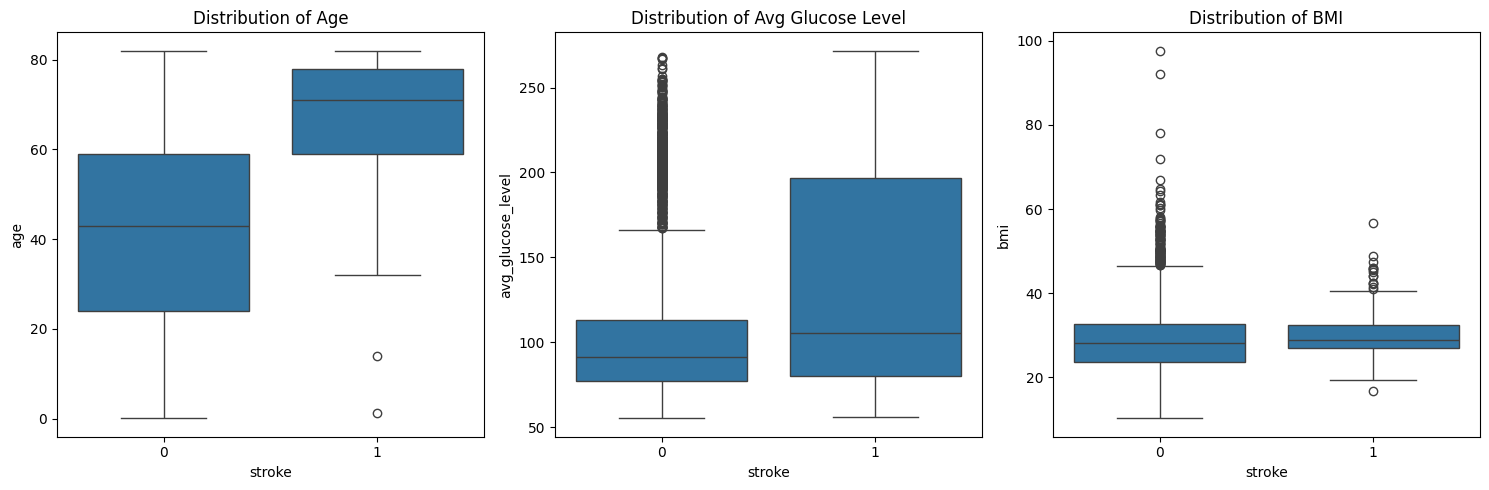

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Box plot for 'age'
sns.boxplot(x='stroke', y='age', data=df, ax=axes[0])
axes[0].set_title('Distribution of Age')

# Box plot for 'avg_glucose_level'
sns.boxplot(x='stroke', y='avg_glucose_level', data=df, ax=axes[1])
axes[1].set_title('Distribution of Avg Glucose Level')

# Box plot for 'bmi'
sns.boxplot(x='stroke', y='bmi', data=df, ax=axes[2])
axes[2].set_title('Distribution of BMI')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


as Age increases, the risk of having a stroke increases too

# Dataset is imbalanced

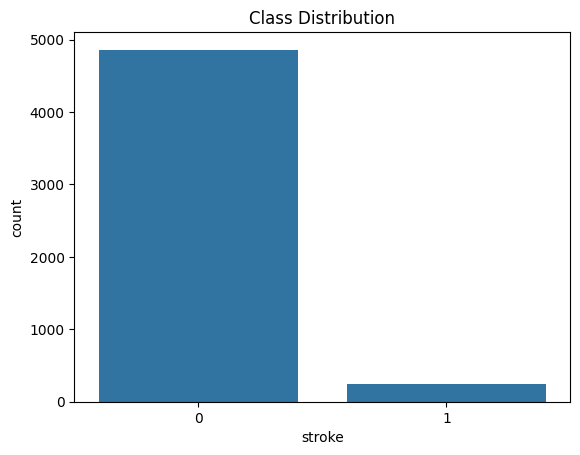

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='stroke', data=df)
plt.title('Class Distribution')
plt.show()


# Split Dataset into X, Y

In [35]:
# Train
X = df.drop('stroke',axis=1)
y = df['stroke']
X = X.drop(['id', 'smoking_status', 'ever_married', 'Residence_type'],axis=1)

# Apply one hot encoding to Categorical features

In [36]:
import pandas as pd

# Perform one-hot encoding
X = pd.get_dummies(X)

# Print the result
X

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,67.0,0,1,228.69,36.600000,0,1,0,0,0,1,0,0
1,61.0,0,0,202.21,28.893237,1,0,0,0,0,0,1,0
2,80.0,0,1,105.92,32.500000,0,1,0,0,0,1,0,0
3,49.0,0,0,171.23,34.400000,1,0,0,0,0,1,0,0
4,79.0,1,0,174.12,24.000000,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,28.893237,1,0,0,0,0,1,0,0
5106,81.0,0,0,125.20,40.000000,1,0,0,0,0,0,1,0
5107,35.0,0,0,82.99,30.600000,1,0,0,0,0,0,1,0
5108,51.0,0,0,166.29,25.600000,0,1,0,0,0,1,0,0


# Split Train Data into Train and Validation sets


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify = y)

In [38]:
X_train.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
2226,52.0,0,0,107.84,22.0,1,0,0,1,0,0,0,0
3927,62.0,0,0,88.32,36.3,1,0,0,0,0,1,0,0
3358,81.0,0,1,95.49,29.4,0,1,0,0,0,0,1,0
4152,55.0,0,0,73.57,28.0,0,1,0,0,0,0,1,0
4866,37.0,0,0,103.66,36.1,1,0,0,0,0,1,0,0


# Balance the Dataset

In [39]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_train_resh, y_train_resh = oversample.fit_resample(X_train, y_train.ravel())

# **Random Forest**

# Hypertuning Parameters

In [40]:
from sklearn.model_selection import GridSearchCV

n_estimators =[64,100,128,200]
max_features = [2,3,5,7]
bootstrap = [True,False]

param_grid = {'n_estimators':n_estimators,
             'max_features':max_features,
             'bootstrap':bootstrap}
rfc = RandomForestClassifier()

grid = GridSearchCV(rfc,param_grid)

grid.fit(X_train,y_train)

grid.best_params_

{'bootstrap': True, 'max_features': 3, 'n_estimators': 100}

# Cross Validation

In [41]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

RF = RandomForestClassifier(max_features=3,n_estimators=100,bootstrap=True)

RF.fit(X_train_resh, y_train_resh)

RandomForestClassifier(max_features=3)

In [42]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Perform stratified cross-validation
cv_scores = cross_val_score(RF, X_train_resh, y_train_resh, cv=stratified_kfold, scoring='f1')

# Display the cross-validation scores
print("Stratified Cross-Validation Scores:", cv_scores)
print("Mean f1_score:", cv_scores.mean())

Stratified Cross-Validation Scores: [0.97067449 0.96130952 0.97947214 0.96307238 0.95703704 0.96187683
 0.95447871 0.9619883  0.95930233 0.9657228 ]
Mean f1_score: 0.9634934538641977


In [43]:
y_pred = RF.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{classification_report_str}')

Accuracy: 0.9217221135029354
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1458
           1       0.18      0.17      0.18        75

    accuracy                           0.92      1533
   macro avg       0.57      0.57      0.57      1533
weighted avg       0.92      0.92      0.92      1533



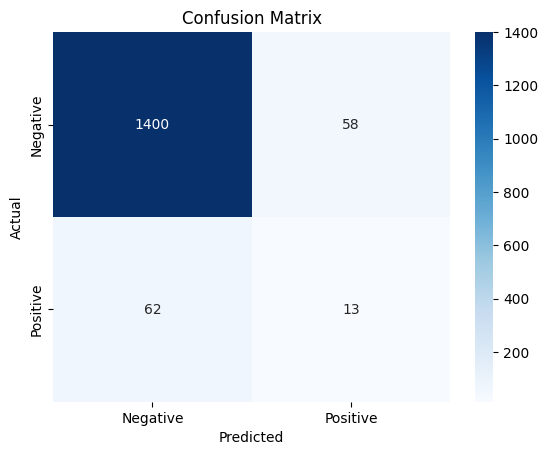

In [44]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are your true labels and predicted labels, respectively
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix as a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

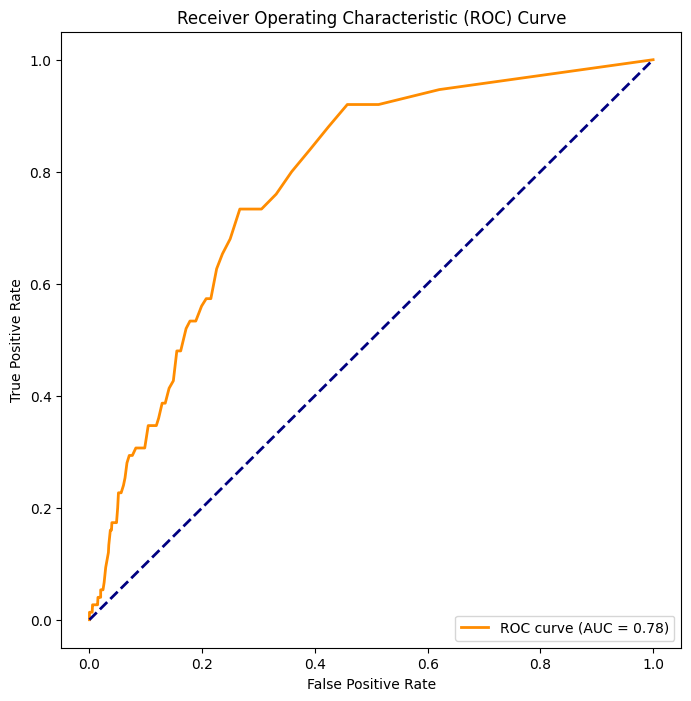

In [45]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming RF is your trained Random Forest model and X_test, y_test are your test features and labels
y_test_pred_proba = RF.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# **Logisitc Regression**

# Hypertuning Parameters

In [46]:
from sklearn.linear_model import LogisticRegression
penalty = ['l1','l2']
C = [0.001, 0.01, 0.1, 1, 10, 100]

log_param_grid = {'penalty': penalty,
                  'C': C}
logreg = LogisticRegression()
grid = GridSearchCV(logreg,log_param_grid)

grid.fit(X_train_resh,y_train_resh)
grid.best_params_

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

{'C': 100, 'penalty': 'l2'}

# Cross Validation

In [47]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

logreg = LogisticRegression(C=100,penalty='l2',random_state=42)

logreg.fit(X_train_resh, y_train_resh)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=100, random_state=42)

In [48]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Perform stratified cross-validation
cv_scores = cross_val_score(logreg, X_train_resh, y_train_resh, cv=stratified_kfold, scoring='f1')

# Display the cross-validation scores
print("Stratified Cross-Validation Scores:", cv_scores)
print("Mean f1_score:", cv_scores.mean())

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Stratified Cross-Validation Scores: [0.89022556 0.87179487 0.87869822 0.86736215 0.86461538 0.86943164
 0.86890244 0.86826347 0.83911672 0.87595712]
Mean f1_score: 0.8694367587149241


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [49]:
y_pred = logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{classification_report_str}')

Accuracy: 0.8799739073711677
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.90      0.93      1458
           1       0.20      0.49      0.29        75

    accuracy                           0.88      1533
   macro avg       0.59      0.70      0.61      1533
weighted avg       0.93      0.88      0.90      1533



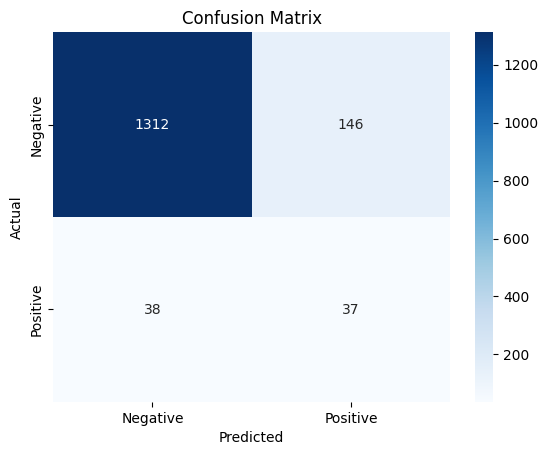

In [50]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are your true labels and predicted labels, respectively
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix as a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

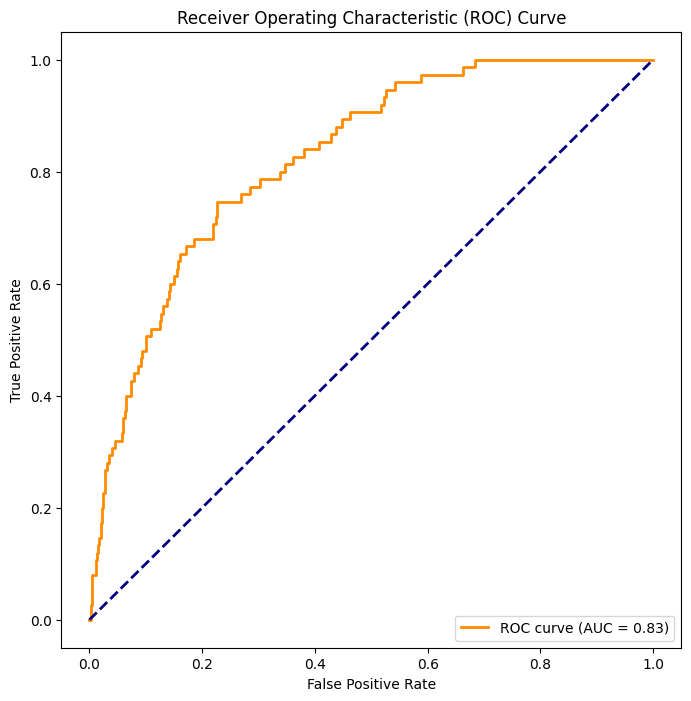

In [51]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming RF is your trained Random Forest model and X_test, y_test are your test features and labels
y_test_pred_proba = logreg.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


To Finalize we can see that the Random forest accuracy is greater than the logistic regression yet in cases of medical conditions it is essential to consider the recall (reduction of type II error) and according the recall the logistic regression has better performance and higher ROC-AUC

**Logistic regression** is the better model